# **Librerias Necesarias**

In [2]:
%run Proyecto_idDrRecursos.ipynb

**Eliminacion de audios menor a 1 segundo**

Tenia la idea de que los valores a tomar dependerian de la duración del audio, sin embargo no fue asi, nos centramos en las amplitudes de sus respectivas frecuencias.

In [3]:
#Filtro de audios Drone con duración mayor a 1 s
#Ruta de la carpeta que contiene los audios 
carpeta_audios = "/home/kinlo/Desktop/Proyecto/Proyecto/Recursos_dig/Seleccion/Drone/*"

#Patron para buscar archivos de audio dentro de la carpeta 
patron_audio = ".wav"

#Lista para almacenar info del audio 
lista_audios = []

#Iterar sobre todos los archivos de audio en la carpeta 
for archivo_audio in glob.glob(carpeta_audios):
    #Cargar el audio y su tasa de muestreo
    audio, sr = librosa.load(archivo_audio)
    #Agregar el nombre del archivo, tasa muestreo y su duración a la lista 
    duration = librosa.get_duration(y=audio, sr=sr)
    name = archivo_audio.split("/")[-1]
    if duration >= 1:
        audio, sr = librosa.load(archivo_audio, duration=1)
        duration = librosa.get_duration(y=audio, sr=sr)
        lista_audios.append((name, sr, duration))
    else:
        os.remove(archivo_audio)

#Visualización de los datos
for audio_info in lista_audios:
    print(f"Nombre del archivo: {audio_info[0]}\n",
    f"Tasa de muestreo: {audio_info[1]}\n",
    f"Duracion: {audio_info[2]}\n")

print(len(lista_audios))

Nombre del archivo: B_S2_D1_100-bebop_000_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_077-bebop_001_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_115-bebop_003_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_090-bebop_002_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_086-bebop_003_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_084-bebop_003_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_081-bebop_000_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_103-bebop_003_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_088-bebop_003_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_101-bebop_000_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_111-bebop_000_.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: B_S2_D1_067-

In [4]:
#Filtro de audios Drone_unknown con duración mayor a 1 s
#Ruta de la carpeta que contiene los audios 
carpeta_audios = "/home/kinlo/Desktop/Proyecto/Proyecto/Recursos_dig/Seleccion/Drone_unknown/*"

#Patron para buscar archivos de audio dentro de la carpeta 
patron_audio = ".wav"

#Lista para almacenar info del audio 
lista_audios = []

#Iterar sobre todos los archivos de audio en la carpeta 
for archivo_audio in glob.glob(carpeta_audios):
    #Cargar el audio y su tasa de muestreo
    audio, sr = librosa.load(archivo_audio)
    #Agregar el nombre del archivo, tasa muestreo y su duración a la lista 
    duration = librosa.get_duration(y=audio, sr=sr)
    name = archivo_audio.split("/")[-1]
    if duration >= 1:
        audio, sr = librosa.load(archivo_audio, duration=1)
        duration = librosa.get_duration(y=audio, sr=sr)
        lista_audios.append((name, sr, duration))
    else:
        os.remove(archivo_audio)

#Visualización de los datos
for audio_info in lista_audios:
    print(f"Nombre del archivo: {audio_info[0]}\n",
    f"Tasa de muestreo: {audio_info[1]}\n",
    f"Duracion: {audio_info[2]}\n")


print(len(lista_audios))

Nombre del archivo: 1-4211-A-123.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-114587-A-01.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-119748-A-383.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-128631-A-213.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-110613-A-131.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-123712-A-330.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-121909-A-351.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-128465-A-433.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-128465-B-431.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-112213-B-391.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-122067-B-453.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-122616-A-141.wav
 Tasa de muestreo: 22050
 Duracion: 1.0

Nombre del archivo: 2-125966-A-111.wav
 Tas

### **Visualización de espectro de frecuencias con presencia de Dron**

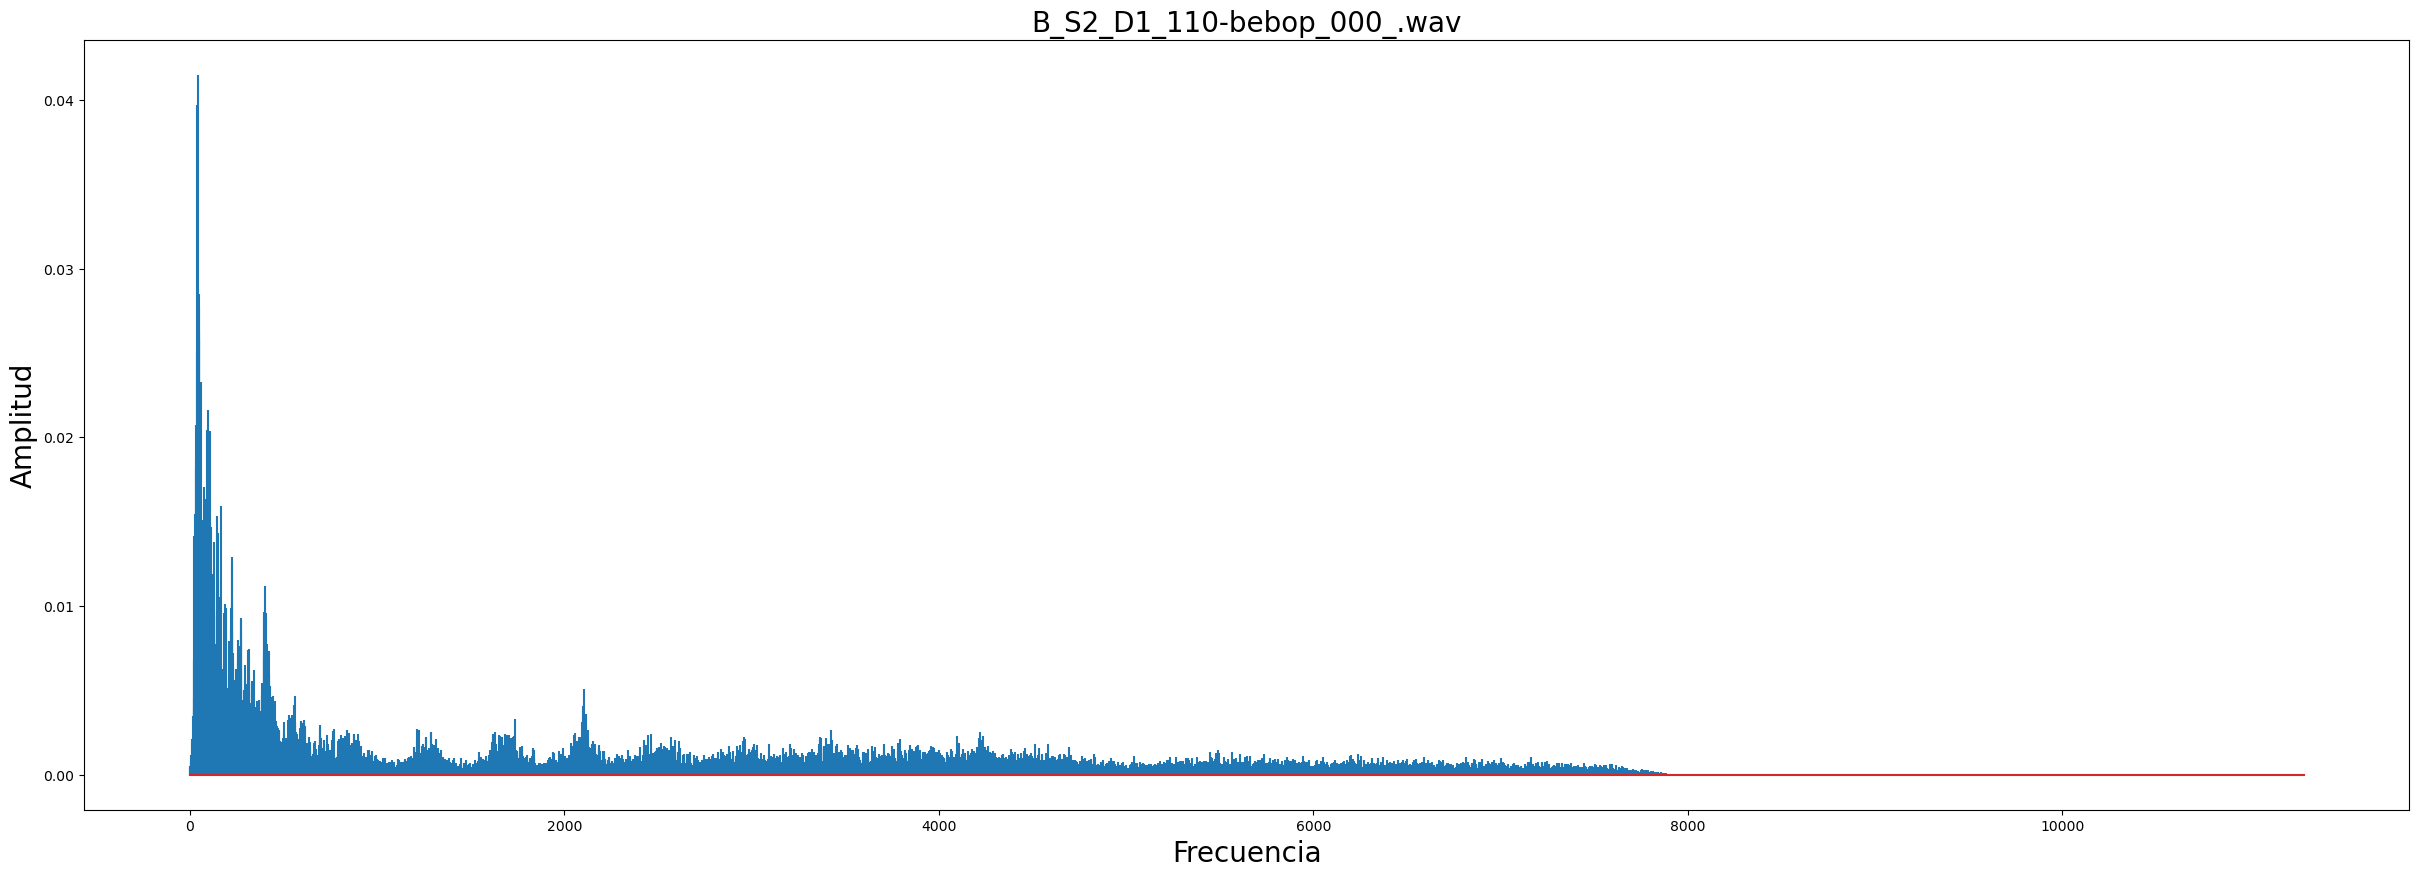

In [23]:
j = 0
plt.figure(figsize=(30, 10))
for i in [1]:
    audio, sr = librosa.load(f"Seleccion/Drone/B_S2_D1_067-bebop_00{str(j)}_.wav")
    duration = librosa.get_duration(y=audio, sr=sr)
    sr = int(duration * sr)
    t = np.linspace(0,1,sr)
    fft_result = np.fft.fft(audio)
    fft_result /= (sr / 2)
    fft_result = np.abs(fft_result)
    fft_result = fft_result[:len(fft_result) // 2]
    fft_freq = np.fft.fftfreq(sr, 1 / sr)
    fft_freq = fft_freq[:len(fft_freq) // 2]
    #plt.subplot(8, 1, i)
    #plt.plot(t, audio)
    plt.title(f"B_S2_D1_110-bebop_00{str(j)}_.wav",size=20)
    #plt.subplot(8, 1, i+1)
    plt.stem(fft_freq, fft_result,markerfmt=" ")
    plt.xlabel("Frecuencia",size=20)
    plt.ylabel("Amplitud",size=20)
    j += 1

plt.show()


### **Visualización de espectro de frecuencias sin presencia de Dron**

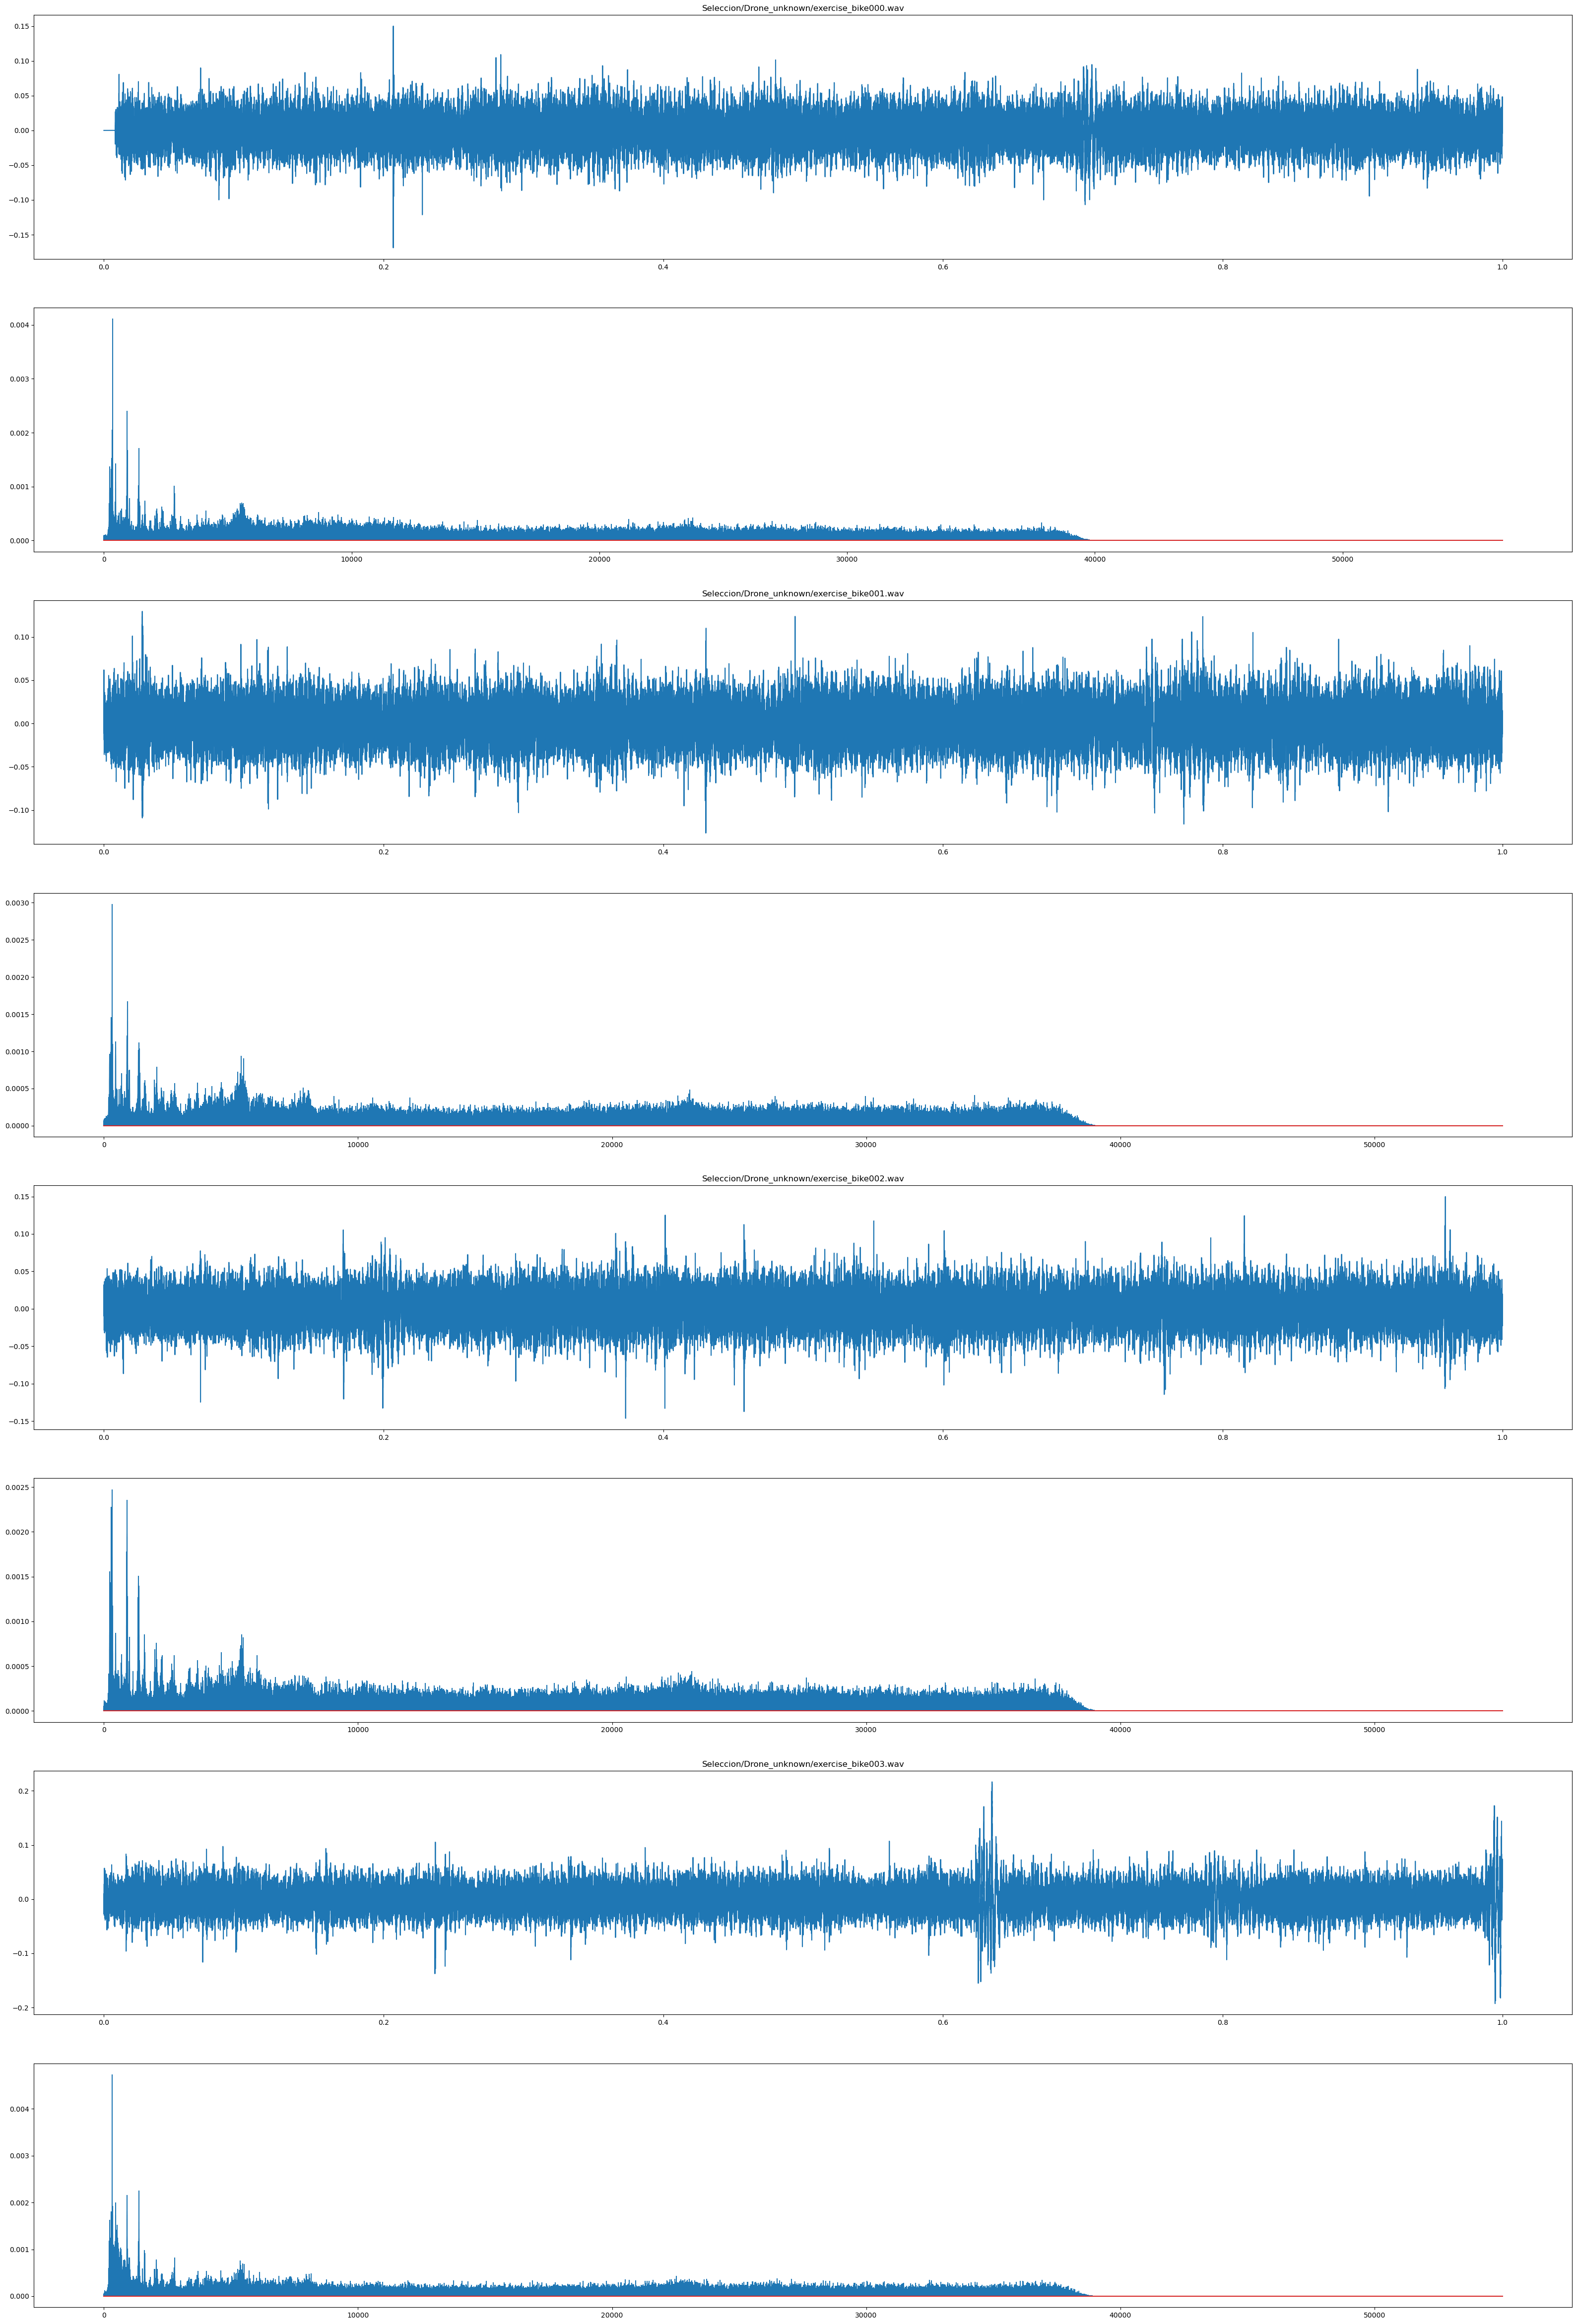

In [22]:
j = 0
plt.figure(figsize=(40,60))
for i in range(1, 9, 2):
    audio, sr = librosa.load(f"Seleccion/Drone_unknown/exercise_bike00{str(j)}.wav")
    duration = librosa.get_duration(y=audio, sr=sr)
    sr = int(duration * sr)
    t = np.linspace(0,1,sr)
    fft_result = np.fft.fft(audio)
    fft_result /= (sr / 2)
    fft_result = np.abs(fft_result)
    fft_result = fft_result[:len(fft_result) // 2]
    fft_freq = np.fft.fftfreq(sr, 1 / sr)
    fft_freq = fft_freq[:len(fft_freq) // 2]
    plt.subplot(8, 1, i)
    plt.plot(t, audio)
    plt.title(f"Seleccion/Drone_unknown/exercise_bike00{str(j)}.wav")
    plt.subplot(8, 1, i+1)
    plt.stem(fft_freq, fft_result,markerfmt=" ")
    j += 1

plt.show()